In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 표의 크기를 조정해준다.
plt.rcParams['figure.figsize'] = [10, 8]
sns.set(style='whitegrid')
sns.set_palette('pastel') # 시각화 테마
warnings.filterwarnings('ignore')

# % 한글이 깨지는 경우 %
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/NanumGothic.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [60]:
# Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
tips.shape

(244, 7)

In [62]:
# matplotlib 을 활용한 시각화
sum_tips_by_day = tips.groupby('day')['tip'].sum()
sum_tips_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [63]:
x_label = ['Thu', 'Fri', 'Sat', 'Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

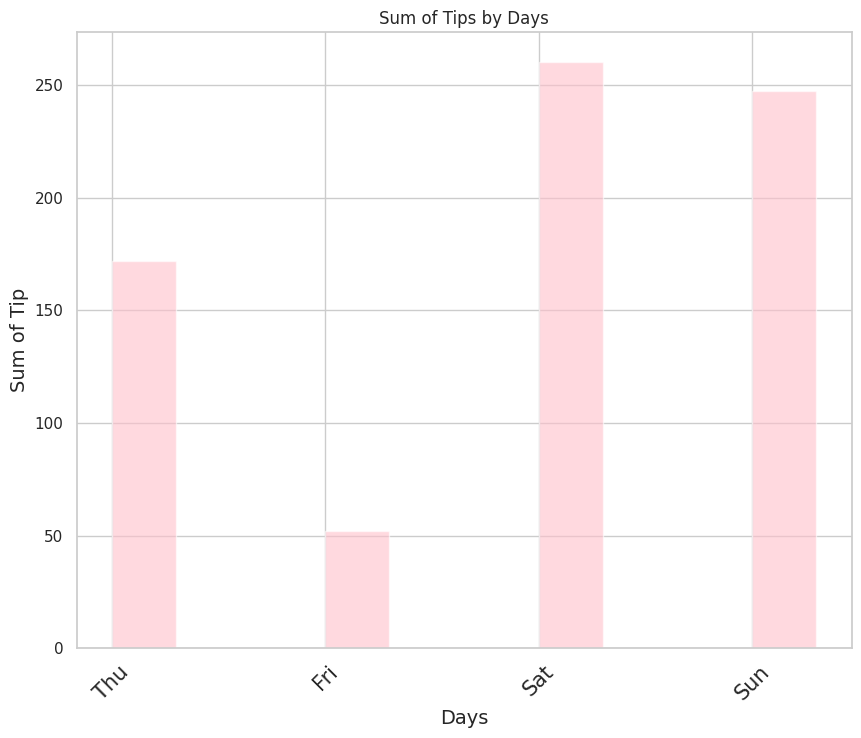

In [69]:
# Bar 차트 이해 및 제작
plt.bar(x_label, sum_tips_by_day,
        color = 'pink',
        alpha = 0.6,
        width = 0.3,
        align = 'edge')

# 제목 추가
plt.title('Sum of Tips by Days')
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Sum of Tip', fontsize = 14)

# x변수 가로축 수정이 가능하다.
plt.xticks(x_label_index,
           x_label,
           rotation = 45,
           fontsize = 15)

plt.show()

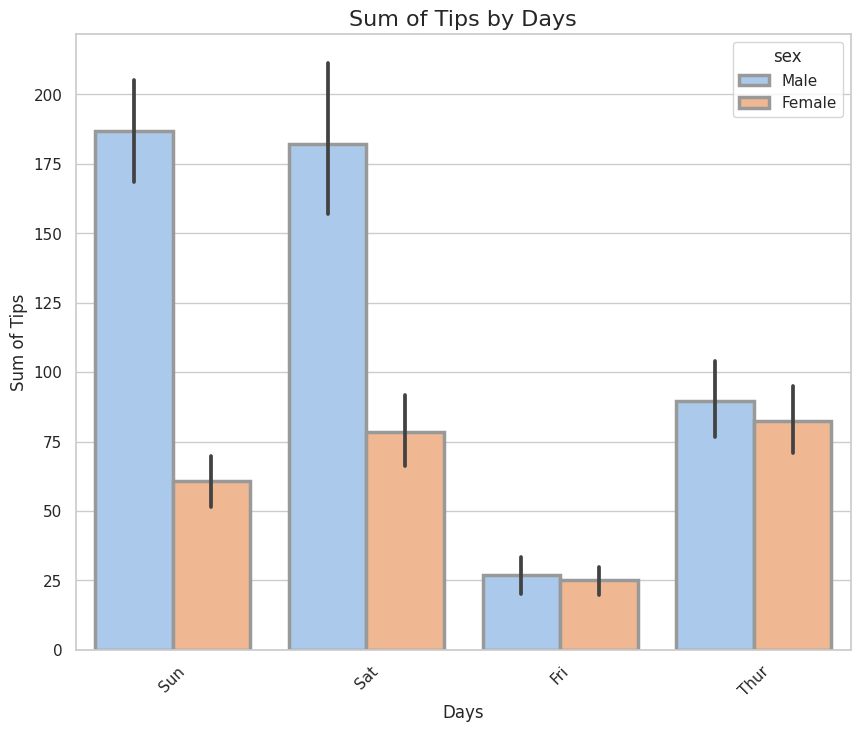

In [81]:
# seaborn 을 활용한 시각화
sns.barplot(data= tips, # 데이터프레임
            x = 'day', # x 변수
            y = 'tip', # y 변수
            estimator = np.sum, # 원하는 값들을 지정할 수 있다.
            hue = 'sex', # 색깔 구분으로 특정 컬럼값을 비교하고 싶을 때
            order = ['Sun', 'Sat', 'Fri', 'Thur'], # x ticks 순서
            edgecolor = '.6', # bar 모서리 선명도
            linewidth = 2.5)  # 모서리 두께

plt.title('Sum of Tips by Days', fontsize = 16)
plt.xlabel('Days')
plt.ylabel('Sum of Tips')
plt.xticks(rotation = 45)
plt.show()